In [7]:
import pandas as pd
import re

raw_text = """{GOLD - COMMODITY EXCHANGE INC.                                                                                                                   Code-088691
Disaggregated Commitments of Traders - Futures Only, November 10, 2025                                                                                       
-------------------------------------------------------------------------------------------------------------------------------------------------------------
     :          :                                              Reportable Positions                                                      :   Nonreportable
     :          :  Producer/Merchant/ :                                :                                :                                :     Positions
     :   Open   :   Processor/User    :          Swap Dealers          :         Managed Money          :       Other Reportables        :
     : Interest :   Long   :  Short   :   Long   :  Short   :Spreading :   Long   :  Short   :Spreading :   Long   :  Short   :Spreading :   Long  :  Short
-------------------------------------------------------------------------------------------------------------------------------------------------------------
     :          :(CONTRACTS OF 100 TROY OUNCES)                                                                                          :
     :          :    Positions                                                                                                           :
All  :   459,997:     9,875     68,621     43,176    229,253     34,025    134,155     30,068     19,999    131,761     28,779     30,264:   56,742    18,988
Old  :   459,997:     9,875     68,621     43,176    229,253     34,025    134,155     30,068     19,999    131,761     28,779     30,264:   56,742    18,988
Other:         0:         0          0          0          0          0          0          0          0          0          0          0:        0         0
     :          :                                                                                                                        :
     :          :    Changes in Commitments from:       November 4, 2025                                                                 :
     :     9,598:        70       -635     -4,019      4,967      2,670      3,467        -75     -6,898      5,877      4,657      5,350:    3,081      -438
     :          :                                                                                                                        :
     :          :    Percent of Open Interest Represented by Each Category of Trader                                                     :
All  :     100.0:       2.1       14.9        9.4       49.8        7.4       29.2        6.5        4.3       28.6        6.3        6.6:     12.3       4.1
Old  :     100.0:       2.1       14.9        9.4       49.8        7.4       29.2        6.5        4.3       28.6        6.3        6.6:     12.3       4.1
Other:     100.0:       0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0:      0.0       0.0
     :          :                                                                                                                        :
     :          :    Number of Traders in Each Category                                                                                  :
All  :       317:        13         16         21         25         29         82         22         36        109         30         39:
Old  :       317:        13         16         21         25         29         82         22         36        109         30         39:
Other:         0:         0          0          0          0          0          0          0          0          0          0          0:
     :-------------------------------------------------------------------------------------------------------------------------------------------------------
     :             Percent of Open Interest Held by the Indicated Number of the Largest Traders
     :                          By Gross Position                       By Net Position
     :               4 or Less Traders     8 or Less Traders     4 or Less Traders     8 or Less Traders
     :                 Long:     Short       Long      Short:      Long      Short       Long      Short
     :----------------------------------------------------------------------------------------------------
All  :                 14.9       31.3       25.3       47.7       14.7       30.1       23.8       44.6
Old  :                 14.9       31.3       25.3       47.7       14.7       30.1       23.8       44.6
Other:                  0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0}"""  # Paste your full raw text here

# Helper function to clean and split lines into columns
def parse_line(line):
    # Remove extra spaces at start/end
    line = line.strip()
    # Replace multiple spaces with a single colon separator
    parts = re.split(r'\s{2,}', line)
    # Remove empty strings
    parts = [p for p in parts if p]
    return parts

# Split the text into lines
lines = raw_text.splitlines()

# Sections to parse
sections = {
    'Reportable Positions': [],
    'Changes in Commitments': [],
    'Percent of Open Interest': [],
    'Number of Traders': [],
    'Percent of Largest Traders': []
}

current_section = None

for line in lines:
    if "Reportable Positions" in line:
        current_section = 'Reportable Positions'
        continue
    elif "Changes in Commitments" in line:
        current_section = 'Changes in Commitments'
        continue
    elif "Percent of Open Interest Represented" in line:
        current_section = 'Percent of Open Interest'
        continue
    elif "Number of Traders in Each Category" in line:
        current_section = 'Number of Traders'
        continue
    elif "Percent of Open Interest Held by the Indicated Number" in line:
        current_section = 'Percent of Largest Traders'
        continue

    if current_section and line.strip() and not line.startswith('-') and not line.startswith('{'):
        sections[current_section].append(parse_line(line))

# Convert each section into a DataFrame
dfs = {}
for key, data in sections.items():
    if not data:
        continue
    # Use first column as index if it looks like a row label
    index = [row[0] for row in data]
    # Take the remaining columns as data
    columns_data = [row[1:] for row in data]
    # Determine max number of columns
    max_cols = max(len(r) for r in columns_data)
    # Pad rows to have same number of columns
    columns_data = [r + ['']*(max_cols - len(r)) for r in columns_data]
    # Create column names
    col_names = [f"Col{i+1}" for i in range(max_cols)]
    dfs[key] = pd.DataFrame(columns_data, index=index, columns=col_names)

# Example: Access Reportable Positions DataFrame
reportable_positions_df = dfs.get('Reportable Positions')
print("Reportable Positions:")
print(reportable_positions_df)

# You can similarly access other sections:
# dfs['Changes in Commitments']
# dfs['Percent of Open Interest']
# dfs['Number of Traders']
# dfs['Percent of Largest Traders']


Reportable Positions:
                                         Col1                  Col2  \
:                                           :  Producer/Merchant/ :   
:                                        Open                     :   
: Interest :                             Long                     :   
:             :(CONTRACTS OF 100 TROY OUNCES)                     :   
:                                           :             Positions   
All                                         :              459,997:   
Old                                         :              459,997:   
Other:                                     0:                     0   
:                                           :                     :   

                        Col3    Col4          Col5       Col6           Col7  \
:                          :       :             :  Positions                  
:             Processor/User       :  Swap Dealers          :  Managed Money   
: Interest :           Shor

In [8]:
import pandas as pd
import re

cot_report = """
GOLD - COMMODITY EXCHANGE INC.
Code-088691
Disaggregated Commitments of Traders - Futures Only, November 10, 2025
-------------------------------------------------------------------------------------------------------------------------------------------------------------
     :          :                                              Reportable Positions                                                      :   Nonreportable
     :          :  Producer/Merchant/ :                                :                                :                                :     Positions
     :   Open   :   Processor/User    :          Swap Dealers          :         Managed Money          :       Other Reportables        :
     : Interest :   Long   :  Short   :   Long   :  Short   :Spreading :   Long   :  Short   :Spreading :   Long   :  Short   :Spreading :   Long  :  Short
-------------------------------------------------------------------------------------------------------------------------------------------------------------
     :          :(CONTRACTS OF 100 TROY OUNCES)                                                                                          :
     :          :    Positions                                                                                                           :
All  :   459,997:     9,875     68,621     43,176    229,253     34,025    134,155     30,068     19,999    131,761     28,779     30,264:   56,742    18,988
Old  :   459,997:     9,875     68,621     43,176    229,253     34,025    134,155     30,068     19,999    131,761     28,779     30,264:   56,742    18,988
Other:         0:         0          0          0          0          0          0          0          0          0          0          0:        0         0
     :          :                                                                                                                        :
     :          :    Changes in Commitments from:       November 4, 2025                                                                 :
     :     9,598:        70       -635     -4,019      4,967      2,670      3,467        -75     -6,898      5,877      4,657      5,350:    3,081      -438
     :          :                                                                                                                        :
     :          :    Percent of Open Interest Represented by Each Category of Trader                                                     :
All  :     100.0:       2.1       14.9        9.4       49.8        7.4       29.2        6.5        4.3       28.6        6.3        6.6:     12.3       4.1
Old  :     100.0:       2.1       14.9        9.4       49.8        7.4       29.2        6.5        4.3       28.6        6.3        6.6:     12.3       4.1
Other:     100.0:       0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0:      0.0       0.0
     :          :                                                                                                                        :
     :          :    Number of Traders in Each Category                                                                                  :
All  :       317:        13         16         21         25         29         82         22         36        109         30         39:
Old  :       317:        13         16         21         25         29         82         22         36        109         30         39:
Other:         0:         0          0          0          0          0          0          0          0          0          0          0:
     :-------------------------------------------------------------------------------------------------------------------------------------------------------
     :             Percent of Open Interest Held by the Indicated Number of the Largest Traders
     :                          By Gross Position                       By Net Position
     :               4 or Less Traders     8 or Less Traders     4 or Less Traders     8 or Less Traders
     :                 Long:     Short       Long      Short:      Long      Short       Long      Short
     :----------------------------------------------------------------------------------------------------
All  :                 14.9       31.3       25.3       47.7       14.7       30.1       23.8       44.6
Old  :                 14.9       31.3       25.3       47.7       14.7       30.1       23.8       44.6
Other:                  0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0
"""

def parse_section(lines, start_keyword, num_cols, col_names=None):
    """Extract a section of the COT report into a DataFrame."""
    data = []
    capture = False
    for line in lines:
        if start_keyword in line:
            capture = True
            continue
        if capture:
            if not line.strip() or line.startswith("     :"):
                break
            # Split on colon or multiple spaces
            parts = [p.strip() for p in re.split(r':|\s{2,}', line) if p.strip()]
            if parts:
                data.append(parts)
    if col_names:
        df = pd.DataFrame(data, columns=col_names)
    else:
        df = pd.DataFrame(data)
    return df

lines = cot_report.splitlines()

# 1. Positions
positions_cols = ['Type','OpenInterest','Prod_Long','Prod_Short','Swap_Long','Swap_Short','Swap_Spread','MM_Long','MM_Short','MM_Spread','OtherRep_Long','OtherRep_Short','OtherRep_Spread','NonRep_Long','NonRep_Short']
positions_df = parse_section(lines, "Positions", len(positions_cols), positions_cols)

# 2. Changes in Commitments
changes_cols = ['Type','Change_OpenInterest','Prod_Long','Prod_Short','Swap_Long','Swap_Short','Swap_Spread','MM_Long','MM_Short','MM_Spread','OtherRep_Long','OtherRep_Short','OtherRep_Spread','NonRep_Long','NonRep_Short']
changes_df = parse_section(lines, "Changes in Commitments", len(changes_cols), changes_cols)

# 3. Percent of Open Interest
percent_cols = ['Type','Percent_OpenInterest','Prod_Long','Prod_Short','Swap_Long','Swap_Short','Swap_Spread','MM_Long','MM_Short','MM_Spread','OtherRep_Long','OtherRep_Short','OtherRep_Spread','NonRep_Long','NonRep_Short']
percent_df = parse_section(lines, "Percent of Open Interest Represented", len(percent_cols), percent_cols)

# 4. Number of Traders
traders_cols = ['Type','NumTraders','Prod_Long','Prod_Short','Swap_Long','Swap_Short','Swap_Spread','MM_Long','MM_Short','MM_Spread','OtherRep_Long','OtherRep_Short','OtherRep_Spread']
traders_df = parse_section(lines, "Number of Traders", len(traders_cols), traders_cols)

# 5. Percent of Open Interest Held by Largest Traders
largest_cols = ['Type','Gross_4L_Long','Gross_4L_Short','Gross_8L_Long','Gross_8L_Short','Net_4L_Long','Net_4L_Short','Net_8L_Long','Net_8L_Short']
largest_df = parse_section(lines, "Percent of Open Interest Held by the Indicated Number of the Largest Traders", len(largest_cols), largest_cols)

# Print all DataFrames
print("=== Positions ===")
print(positions_df)
print("\n=== Changes in Commitments ===")
print(changes_df)
print("\n=== Percent of Open Interest ===")
print(percent_df)
print("\n=== Number of Traders ===")
print(traders_df)
print("\n=== Percent of Open Interest Held by Largest Traders ===")
print(largest_df)


=== Positions ===
Empty DataFrame
Columns: [Type, OpenInterest, Prod_Long, Prod_Short, Swap_Long, Swap_Short, Swap_Spread, MM_Long, MM_Short, MM_Spread, OtherRep_Long, OtherRep_Short, OtherRep_Spread, NonRep_Long, NonRep_Short]
Index: []

=== Changes in Commitments ===
Empty DataFrame
Columns: [Type, Change_OpenInterest, Prod_Long, Prod_Short, Swap_Long, Swap_Short, Swap_Spread, MM_Long, MM_Short, MM_Spread, OtherRep_Long, OtherRep_Short, OtherRep_Spread, NonRep_Long, NonRep_Short]
Index: []

=== Percent of Open Interest ===
    Type Percent_OpenInterest Prod_Long Prod_Short Swap_Long Swap_Short  \
0    All                100.0       2.1       14.9       9.4       49.8   
1    Old                100.0       2.1       14.9       9.4       49.8   
2  Other                100.0       0.0        0.0       0.0        0.0   

  Swap_Spread MM_Long MM_Short MM_Spread OtherRep_Long OtherRep_Short  \
0         7.4    29.2      6.5       4.3          28.6            6.3   
1         7.4    29.2 

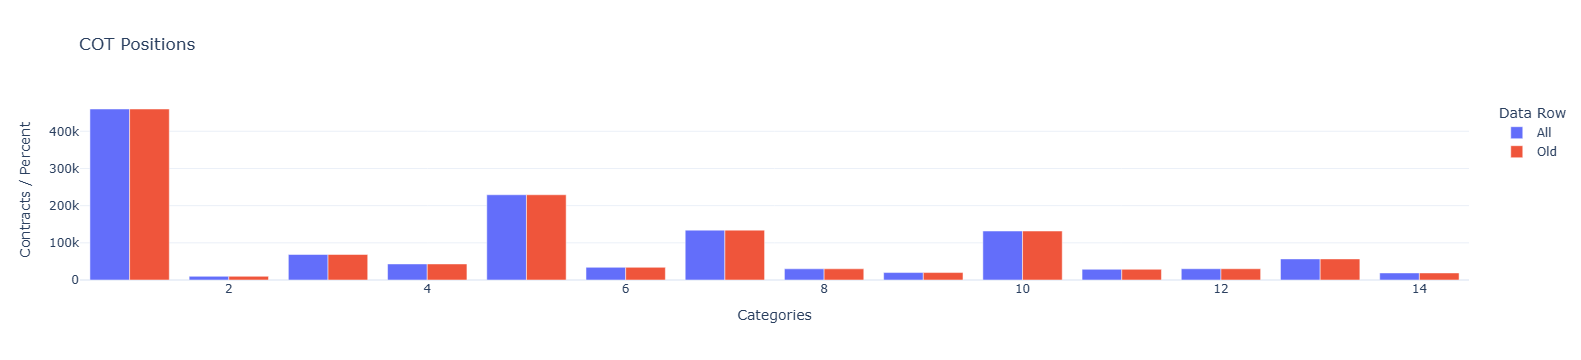

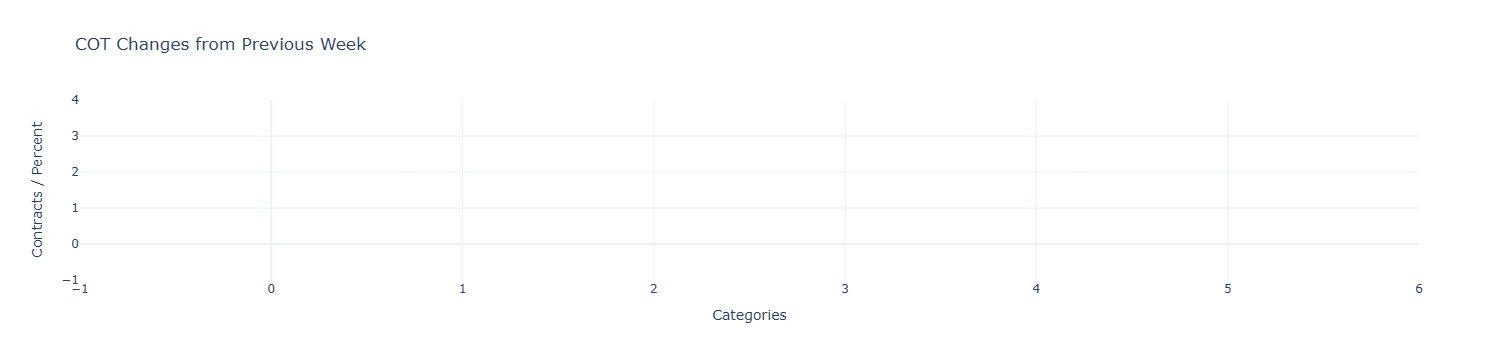

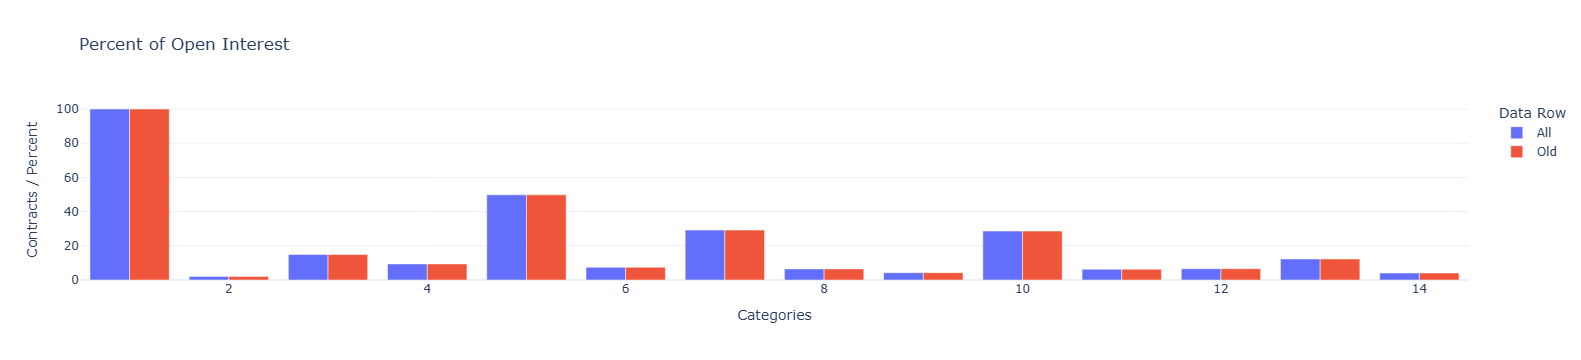

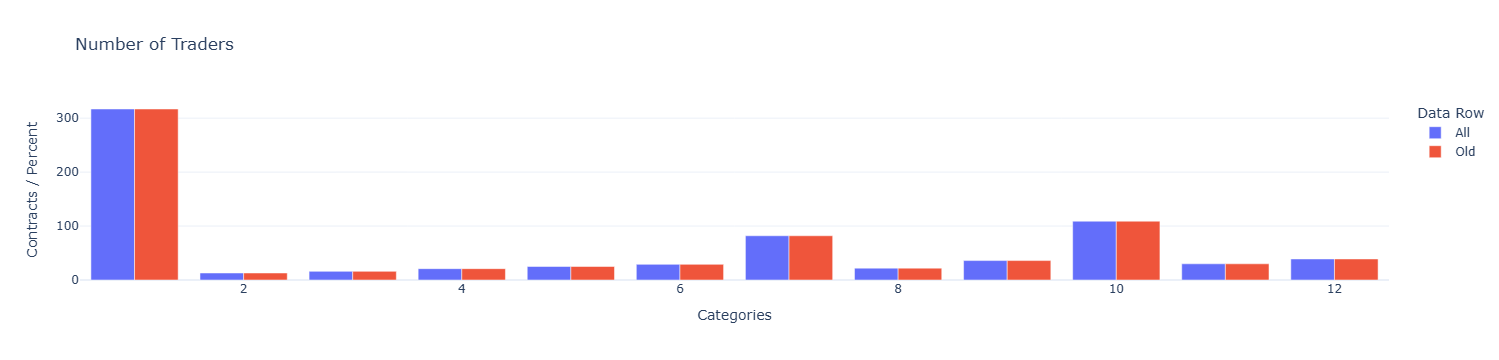

Positions:
     0         1       2        3        4         5        6         7   \
0  All  459997.0  9875.0  68621.0  43176.0  229253.0  34025.0  134155.0   
1  Old  459997.0  9875.0  68621.0  43176.0  229253.0  34025.0  134155.0   

        8        9         10       11       12       13       14  
0  30068.0  19999.0  131761.0  28779.0  30264.0  56742.0  18988.0  
1  30068.0  19999.0  131761.0  28779.0  30264.0  56742.0  18988.0  

Changes:
 Empty DataFrame
Columns: []
Index: []

Percent of Open Interest:
     0      1    2     3    4     5    6     7    8    9     10   11   12  \
0  All  100.0  2.1  14.9  9.4  49.8  7.4  29.2  6.5  4.3  28.6  6.3  6.6   
1  Old  100.0  2.1  14.9  9.4  49.8  7.4  29.2  6.5  4.3  28.6  6.3  6.6   

     13   14  
0  12.3  4.1  
1  12.3  4.1  

Number of Traders:
     0      1     2     3     4     5     6     7     8     9      10    11  \
0  All  317.0  13.0  16.0  21.0  25.0  29.0  82.0  22.0  36.0  109.0  30.0   
1  Old  317.0  13.0  16.0  21.

In [9]:
import pandas as pd
import plotly.graph_objects as go
from io import StringIO

# =========================
# Paste your raw COT report here as a string
# =========================
raw_data = """
GOLD - COMMODITY EXCHANGE INC.
Code-088691
Disaggregated Commitments of Traders - Futures Only, November 10, 2025
-------------------------------------------------------------------------------------------------------------------------------------------------------------
:          :                                              Reportable Positions                                                      :   Nonreportable
:          :  Producer/Merchant/ :                                :                                :                                :     Positions
:   Open   :   Processor/User    :          Swap Dealers          :         Managed Money          :       Other Reportables        :
: Interest :   Long   :  Short   :   Long   :  Short   :Spreading :   Long   :  Short   :Spreading :   Long   :  Short   :Spreading :   Long  :  Short
-------------------------------------------------------------------------------------------------------------------------------------------------------------
:          :(CONTRACTS OF 100 TROY OUNCES)                                                                                          :
:          :    Positions                                                                                                           :
All  :   459,997:     9,875     68,621     43,176    229,253     34,025    134,155     30,068     19,999    131,761     28,779     30,264:   56,742    18,988
Old  :   459,997:     9,875     68,621     43,176    229,253     34,025    134,155     30,068     19,999    131,761     28,779     30,264:   56,742    18,988
Other:         0:         0          0          0          0          0          0          0          0          0          0          0:        0         0
:          :                                                                                                                        :
:          :    Changes in Commitments from:       November 4, 2025                                                                 :
:     9,598:        70       -635     -4,019      4,967      2,670      3,467        -75     -6,898      5,877      4,657      5,350:    3,081      -438
:          :                                                                                                                        :
:          :    Percent of Open Interest Represented by Each Category of Trader                                                     :
All  :     100.0:       2.1       14.9        9.4       49.8        7.4       29.2        6.5        4.3       28.6        6.3        6.6:     12.3       4.1
Old  :     100.0:       2.1       14.9        9.4       49.8        7.4       29.2        6.5        4.3       28.6        6.3        6.6:     12.3       4.1
Other:     100.0:       0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0:      0.0       0.0
:          :                                                                                                                        :
:          :    Number of Traders in Each Category                                                                                  :
All  :       317:        13         16         21         25         29         82         22         36        109         30         39:
Old  :       317:        13         16         21         25         29         82         22         36        109         30         39:
Other:         0:         0          0          0          0          0          0          0          0          0          0          0:
"""

# =========================
# Helper function to parse sections
# =========================
def parse_section(section_name, lines):
    # remove empty lines
    lines = [l for l in lines if l.strip() and not l.startswith(":")]
    
    # select lines starting with All, Old, Other
    data_lines = [l for l in lines if l.strip().split()[0] in ["All", "Old", "Other"]]
    
    parsed = []
    for line in data_lines:
        parts = line.replace(":", "").split()
        row_name = parts[0]
        values = [float(x.replace(",", "")) for x in parts[1:]]
        parsed.append([row_name] + values)
    
    return pd.DataFrame(parsed)

# =========================
# Split the raw text into relevant sections
# =========================
sections = raw_data.split(":          :")
positions_lines = []
changes_lines = []
percent_lines = []
num_traders_lines = []

current_section = None
for line in raw_data.splitlines():
    if "Positions" in line and "Contracts" not in line:
        current_section = "positions"
    elif "Changes in Commitments" in line:
        current_section = "changes"
    elif "Percent of Open Interest" in line and "Number of Traders" not in line:
        current_section = "percent"
    elif "Number of Traders in Each Category" in line:
        current_section = "num_traders"
    
    if current_section == "positions":
        positions_lines.append(line)
    elif current_section == "changes":
        changes_lines.append(line)
    elif current_section == "percent":
        percent_lines.append(line)
    elif current_section == "num_traders":
        num_traders_lines.append(line)

# Parse each section
df_positions = parse_section("Positions", positions_lines)
df_changes = parse_section("Changes", changes_lines)
df_percent = parse_section("Percent", percent_lines)
df_traders = parse_section("NumTraders", num_traders_lines)

# =========================
# Plotting using Plotly
# =========================
def plot_cot(df, title):
    fig = go.Figure()
    categories = df.columns[1:]
    for i, row in df.iterrows():
        fig.add_trace(go.Bar(
            x=categories,
            y=row[1:],
            name=row[0]
        ))
    fig.update_layout(
        barmode='group',
        title=title,
        template='plotly_white',
        xaxis_title='Categories',
        yaxis_title='Contracts / Percent',
        legend_title='Data Row'
    )
    fig.show()

# =========================
# Display plots
# =========================
plot_cot(df_positions, "COT Positions")
plot_cot(df_changes, "COT Changes from Previous Week")
plot_cot(df_percent, "Percent of Open Interest")
plot_cot(df_traders, "Number of Traders")

# =========================
# Optional: print DataFrames
# =========================
print("Positions:\n", df_positions)
print("\nChanges:\n", df_changes)
print("\nPercent of Open Interest:\n", df_percent)
print("\nNumber of Traders:\n", df_traders)
